In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import math
import cmath
import numpy
import numpy.fft
import numpy.linalg
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

/Users/Rawan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


$$u_t = \kappa u_{xx}$$ 

Where 

$x \in \Omega = (0, L)$

$u_x(0, t) = 0$ and  $u_x(L, t) = 0$

$u(x, 0) = 3 + \cos\left(\frac{\pi x}{L} \right) - 2 \cos\left(\frac{5 \pi x}{L} \right)$.  

In [2]:
# solved using Explicit Forward Euler Method (foward time centred space)


def HeatEqSol(d):
           
    k = d # thermal diffusivity constant - explore diffrent values for plotting
    L =1.0
    x1 = 0 
    x2 = L  
    T = 1000 # time length
    n = 10 # number of nodes 
    m = 600
    dx = L / (n+1.0)
    dt = T / m 
    t = 0  # intial time 
    s = k*dt/(dx**2.0) # gain prameter 
    print('s is stable if < 0.5      s =', s)  # check if s > 0.5 is true, explicit forward Euler method is unstable we need smaller dt
    
    
    A = numpy.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i,j] = 1.0 - (2.0 * s)
            if i  == j+1:
                A[i,j] = s
            if i == j-1:
                A[i,j] = s
               
    b = numpy.zeros((n,1))

    #B.C
    b[0] = 0   # at x =0
    b[-1] = 0   # at x =L

    x = numpy.linspace(dx/2.0, L-dx/2.0,n)  

    # I.C
    U_tk = 3.0 + numpy.cos(numpy.pi*x / L) - (2.0 * numpy.cos(5.0*numpy.pi*x / L))


    U = numpy.zeros((n,m))
    tvec = numpy.zeros((m,1))

    U[:,0] = U_tk
    tvec[0] = t

    for j in range(m):
        t = t + dt
        U_tk_1 = numpy.matmul(A,U_tk) + b
        U[:,j] = U_tk_1[0]
        
        U_tk = U_tk_1
        tvec[j] = t 
    
    return U_tk, x

s is stable if < 0.5      s = 0.015367
s is stable if < 0.5      s = 0.002783
s is stable if < 0.5      s = 1.089e-05


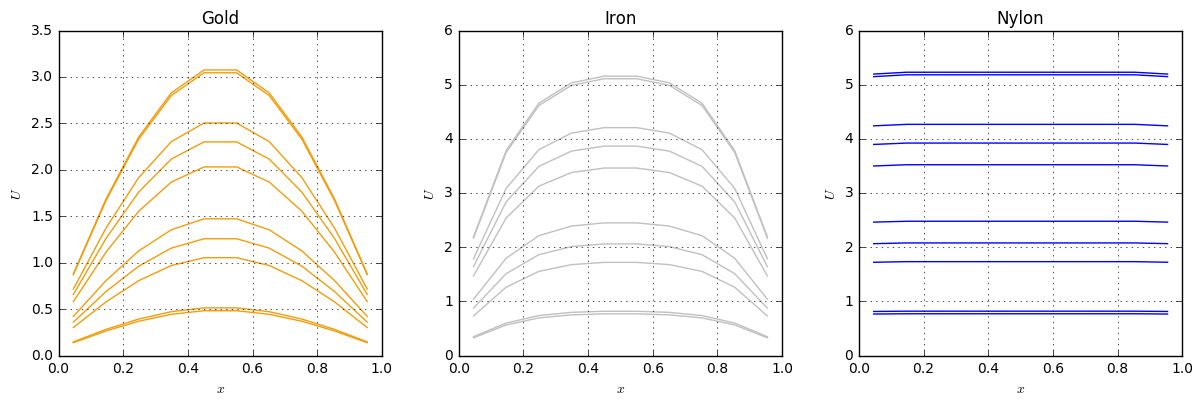

In [3]:
# plotting part 

U_tk_1, x = HeatEqSol(0.000127)
U_tk_2, x = HeatEqSol(0.000023)
U_tk_3, x = HeatEqSol(0.00000009)


fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)


axes = fig.add_subplot(1, 3, 1)
axes.plot(x, U_tk_1,'#f29d0c')
axes.set_title("Gold")
axes.set_xlabel("$ x $")
axes.set_ylabel("$ U $")
plt.grid()

axes = fig.add_subplot(1, 3, 2)
axes.plot(x, U_tk_2,'#C0C0C0')
axes.set_title("Iron")
axes.set_xlabel("$ x $")
axes.set_ylabel("$ U $")
plt.grid()

axes = fig.add_subplot(1, 3, 3)
axes.plot(x, U_tk_3,'b-')
axes.set_title("Nylon")
axes.set_xlabel("$ x $")
axes.set_ylabel("$ U $")
plt.grid()

plt.tight_layout(pad=0.5, w_pad=2.0, h_pad=2.0)



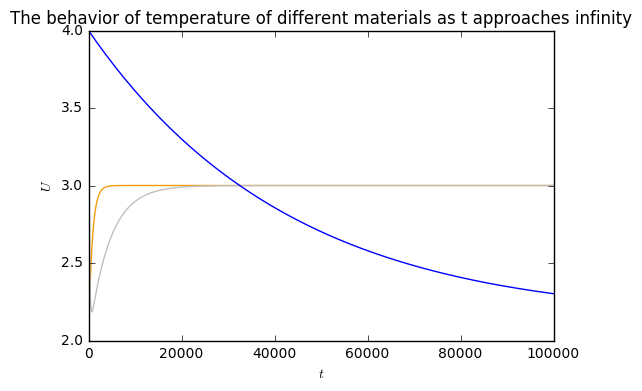

In [4]:
L = 1.0

# solved analytically using seperation of variables
u_true = lambda t,x,k: (3 + numpy.cos(numpy.pi / L * x) * numpy.exp(-k * (numpy.pi/L)**2 * t) \
                 - 2 * numpy.cos(5 * numpy.pi / L * x)* numpy.exp(-k * 25 * (numpy.pi/L)**2 * t))

t = numpy.linspace(1, 100000, 1000)
x = numpy.linspace(1, 10 * numpy.pi, 10000)

plt.plot(t,u_true(t,L,0.000127), '#f29d0c')
plt.plot(t,u_true(t,L,0.000023), '#C0C0C0')
plt.plot(t,u_true(t,L,0.00000009), 'b-')

plt.xlabel("$ t $")
plt.ylabel("$ U $")
plt.title("The behavior of temperature of different materials as t approaches infinity")
plt.show()